# Lab 6: Evaluating a classifier

## Introduction

In this lab we will continue our introduction to data classification. Specifically, we will see how to evaluate a classifier using a more analytical approach, using two standard metrics for classification: __accuracy__ and __confusion matrix__. Recall that in lab 5 we used a __qualitative__ approach to analyse the results. As promised then, we will take a __quantitative__ look at the results today, i.e. we will use some metric that quantifies the performance of the classifier, as opposed to rely on a graphical interpretation of the results.

__Note__: you will need to calculate both accuracy and confusion matrix for Coursework 2. You should thus try to write your code as neat and reusable as you can (i. e. use functions!).

As usual, let's import the libraries before we start by running the cell below.

In [2]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

# show matplotlib figures inline
%matplotlib inline

In [3]:
# By default we set figures to be 12"x8" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(12, 8), dpi=110)
plt.rc('font', size=12)

## Load the data

In this lab we will use the Iris dataset again. Let's run the cell below to load the data.

In [4]:
# load the iris train and test sets

def load_iris_data(train_path='iris_train.csv', test_path='iris_test.csv'):
    train_set = np.loadtxt(train_path, delimiter=',')
    test_set = np.loadtxt(test_path, delimiter=',')

    # separate labels from features
    train_labels = train_set[:, 4].astype(np.int)
    train_set = train_set[:, 0:4]
    test_labels = test_set[:, 4].astype(np.int)
    test_set = test_set[:, 0:4]
    
    return train_labels, train_set, test_labels, test_set

train_labels, train_set, test_labels, test_set = load_iris_data()

## 1. Load your results

Load now the results you obtained in lab 5 with your Nearest-Centroid classifier. These should be stored as a single CSV file containing the class predicted by your classifier for each sample in the test set. 

You can use [`np.loadtxt(path, delimiter=',', dtype=np.int`)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt) to load the data.

In [5]:
results = np.loadtxt('../lab_5/reduced_test_pred.csv', delimiter=',')
pred_labels = results[:,0]

## 2. Accuracy

Accuracy is an intuitive standard metric to evaluate the performance of a classifier. 

Calculating the accuracy of a classifier simply corresponds to calculate the __percentage of correctly classified samples__. Naturally, a sample is correctly classified when its ground truth class is the same as the class predicted by the classifier.

Now that you have loaded both the test labels and your predictions, calculate and print the accuracy of your classifier. You will need to calculate the accuracy for coursework 2, so it's best to write a function to do the job.

In [6]:
def calculate_accuracy(gt_labels, pred_labels):
    correct = list(map(lambda x: int(x[0])==int(x[1]), zip(gt_labels, pred_labels))).count(True)
    return correct / len(gt_labels)

calculate_accuracy(test_labels, pred_labels)

0.0

## 3. Confusion Matrix

Accuracy tells us how well a classifier is performing __overall__. However, it doesn't tell us how good the classifier is at recognising the various classes in the dataset. 

Consider the following example: let's suppose we have 10 test samples belonging to three classes. Let's suppose the ground truth test labels are the following:

```python
gt = [0, 0, 0, 0, 0, 0, 0, 1, 1, 2]
```

As you can notice, the test set is quite unbalanced, since we have 7/10 samples belonging to class `0`, 2/10 samples belonging to class `1` and only 1/10 belonging to class `2`. Though this is just a simple example, it resembles a common case. Let's now suppose our classifier predicted the following class labels for our toy test set:

```python
pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
```

So our classifier is classifying every sample as a class `0` sample. Let's calculate the accuracy now: since there are 7/10 samples belonging to class 0 in the test set, the accuracy of the classifier is 70%! Surprisingly high for a classifier that predicts nothing but class `0`, right? 

Without looking at the actual predictions of the classifier we would thus overlook our results. This is when the __confusion matrix__ comes in handy. 

### Definition

The confusion matrix is a square matrix of size $N_c x N_c$, where $N_c$ is the number of classes. The confusion matrix $CM$ is constructed as follows:

$$
CM(i, j) = \frac{\text{# of samples belonging to class $i$ that were classified as class $j$}}{\text{# of samples belonging to class $i$}} \\
$$

Where $i, j \in \{1, \dots, N_c\}$. The elements along the main diagonal correspond to the percentages of correctly classified samples, for each class, while elements outside the main diagional identify the error of the classifier. Thus, a perfect classifier would get an identity matrix. Notice that, by definition, the sum over the elements of each row equals 1.

For the above example, then, the confusion matrix would be the following:

<img src="cm.png" width="250"/>

By looking at the matrix, we can have an immediate understanding as to how the classifier _confuses_ the classes, without having to check the predicted class of each sample. In fact, by looking at the above matrix, we can see that all the test samples are classified as class `0` (first column is all ones). This confusion matrix doesn't look great and tells us our classifier is doing a poor job since it's ignoring 2 out of the 3 classes (but still, accuracy is 70%!). 

Confusion matrices are commonly used to gain a deeper understanding about the performance of a classifier and identify potential issues with specific classes.

Let's code now a little bit. Again, since you will need to calculate the confusion matrix for coursework 2, let's create a function that we can reuse later. Calculate and print the confusion matrix given your results. Recall that the sum over the elements of each row must be 1, so double check that in order to make sure your implementation is correct.

In [7]:
from functools import reduce

def count_classes(labels): return len(set(labels))

def calculate_confusion_matrix(gt_labels, pred_labels):
    num_classes = count_classes(gt_labels)
    arr = np.zeros((num_classes, num_classes))
    both = zip(gt_labels, map(int, pred_labels))
    
    for x in both: arr[ x[0] - 1, x[1] - 1 ] += 1
    for idx, row in enumerate(arr): arr[idx] = row / np.sum(row)

    return arr

conf_matrix = calculate_confusion_matrix(test_labels, pred_labels)
for x in list(zip(test_labels,list(map(int,pred_labels)))):
    print(x)
print(conf_matrix)

(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
[[0.  0.  1. ]
 [1.  0.  0. ]
 [0.1 0.9 0. ]]


### Visualising the confusion matrix

Let's now create a function that plots the confusion matrix as a colour image. This is a common way to display confusion matrices since the colour scales aids the interpretation of the confusion matrix.

You should plot the confusion matrix you calculated before with your own results. You should obtain something like this:

![](cm_iris.png)

Yet again, we want to reuse our code as much as possible, so we will create a function that will plot _any given two-dimensional matrix_ given in input:

__Hints__:

- Use Matplolib's function [`imshow(X)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow)
    - This function takes an optional parameter `cmap` which sets the colour map to be used for the plot. We set `cmap=plt.get_cmap('summer')`. Feel free to try a few different ones to suit your taste. You can read more about colour maps in Matplotlib [here](https://matplotlib.org/tutorials/colors/colormaps.html)
    - This function returns an handle to the plotted image
- Use Matplotlib's function [`colorbar(handle)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colorbar.html) to display the side colour bar. You should pass the aforementioned handle returned by `imshow`
- Use Matplotlib's function [`text`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html) to show the matrix's numbers

We are providing a little code stub to get you started. Note the text enclosed by triple double quotes `"""`. That text is a short documentation to the function that would be displayed by any decent IDE. You can read more about functions documentations [here](https://www.python.org/dev/peps/pep-0257/) 

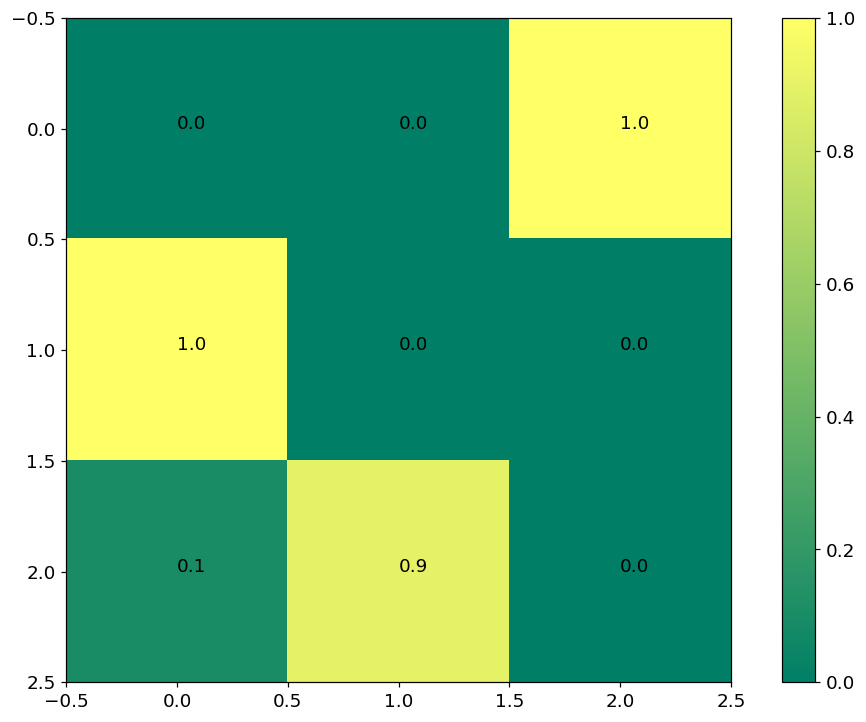

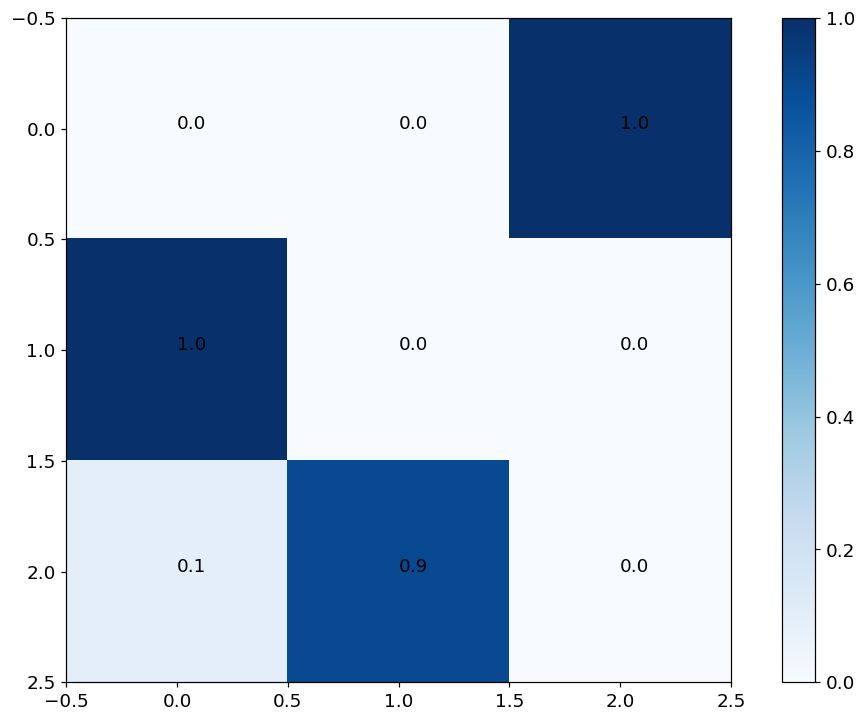

In [10]:
def plot_matrix(matrix, ax=None):
    """
    Displays a given matrix as an image.
    
    Args:
        - matrix: the matrix to be displayed        
        - ax: the matplotlib axis where to overlay the plot. 
          If you create the figure with `fig, fig_ax = plt.subplots()` simply pass `ax=fig_ax`. 
          If you do not explicitily create a figure, then pass no extra argument.  
          In this case the  current axis (i.e. `plt.gca())` will be used        
    """    
    if ax is None:
        ax = plt.gca()
    
    handle = plt.imshow(matrix, cmap=plt.get_cmap('summer'))
    plt.colorbar(handle)
    
    it = np.nditer(matrix, flags=['multi_index'])
    while not it.finished:
        plt.text(it.multi_index[1], it.multi_index[0], it[0])
        it.iternext()

def plot_matrix_alt(matrix):
    fig, ax = plt.subplots()
    
    handle = ax.imshow(matrix, cmap=plt.cm.Blues)#cmap=plt.get_cmap('summer'))
    ax.figure.colorbar(handle)

    it = np.nditer(matrix, flags=['multi_index'])
    while not it.finished:
        plt.text(it.multi_index[1], it.multi_index[0], it[0])
        it.iternext()

plot_matrix(conf_matrix)
plot_matrix_alt(conf_matrix)

## 4. Iris features evaluation

Let's take a step back now. Recall from our previous lab session that we manually selected two out of the four features to classify the iris flowers into the three different classes.

Let's try not to do that now. We will instead evaluate all the pairwise feature combinations. In other words, we want you to __run again your Nearest-Centroid classifier on all the pairwise feature combinations__.

Note that we have already loaded the data in this notebook. If you wrote functions in lab 5 (yay!) you should simply be able to copy and paste your function here to run the classifier again on all the features combination.

Create a 4x4 matrix and store at position (i, j) the __accuracy__ you obtained with your classifier using features i and j.

Finally, plot the 4x4 matrix using the function `plot_matrix` you just coded to see how different features affect the performance of the classifier. Hopefully by now it should be clear why writing reusable code is very useful: we created a function that calculates the accuracy given the prediction of a classifier, and we created a function that plots any given 2D matrix. With very little code thus we can implement this last bit of the sheet.

You should obtain a plot similar to the one below.

![](results_matrix.png)

In [1]:
from collections import defaultdict

def count_classes(labels): return len(set(labels))

def calcCentroids(sample, labels):
    # class -> features
    classes = [ [] for i in range(count_classes(labels) + 1) ]
    for idx, x in enumerate(sample):
        cls = labels[idx]
        classes[cls - 1].append(x)
    
    # class -> centroid
    centroids = [ [] for i in range(count_classes(labels)) ]
    for idx, x in enumerate(classes):
        centroids[idx] = np.mean(x, axis=0)
    return centroids

# returns idx of closest (i.e. class)
def findClosestCentroid(point, centroids):
    dists = dict()
    for idx, x in enumerate(centroids):
        d = np.linalg.norm(point-x)
        dists[idx] = d
    closest = min(dists, key=dists.get)
    #print(dists, '=>', closest)
    return closest

# write your code here (remember to add the needed code from lab 5)
def nearestCentroid(sample, centroids):
    assignments = defaultdict(list)
    for idx, x in enumerate(sample):
        predicted = findClosestCentroid(x, centroids)
        ground = test_labels[idx]
        #print(x, '=>', predicted, '|', ground)
        assignments[predicted].append(x)
    return assignments

def labelsForSample(sample):
    centroids = calcCentroids(sample, test_labels)
    assignments = nearestCentroid(sample, centroids)
    labels = []
    for c in [0,1,2]:
        labels += [ c for x in assignments.get(c) ]
    return labels
#labelsForSample(test_set)
n_features = train_set.shape[1]
for ft1 in range(0, n_features):
    for ft2 in range(0, n_features):
        sample = train_set[:,[ft1,ft2]]
        print(sample)
        labels = labelsForSample(sample)
        calculate_accuracy(test_labels, pred_labels)

#plot_matrix(calculate_confusion_matrix(labels, pred_labels))

NameError: name 'train_set' is not defined

### Question

Compare the qualitative approach we took in lab 5 to the quantitative approach we took here. 

__What are the benefits of using each approach?__ 

Notice that both approaches are valid and commonly used when evaluating a classifier or any machine learning algorithm in general.

### Answer

Write your answer here